<a href="https://colab.research.google.com/github/MJggg/log/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.2.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [3]:
!unrar x ../yolo_A.rar ../


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from ../yolo_A.rar

Creating    ../yolo_A                                                 OK
Extracting  ../yolo_A/A.yaml                                               0%  OK 
Creating    ../yolo_A/images                                          OK
Extracting  ../yolo_A/images/1.jpg                                        10%  OK 
Extracting  ../yolo_A/images/2.jpg                                        31%  OK 
Extracting  ../yolo_A/images/3.jpg                                        47%  OK 
Extracting  ../yolo_A/images/4.jpg                                        50%  OK 
Extracting  ../yolo_A/images/a.jpg                                        56%  OK 
Extracting  ../yolo_A/images/b.jpg                                        58%  OK 
Extracting  ../yolo_A/images/c.jpg                                        61%  OK 
Extracting 

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 133MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 94.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 55.6ms
Speed: 0.7ms pre-process, 74.8ms inference, 558.0ms NMS per image at shape (1, 3, 640, 640)
Results saved t

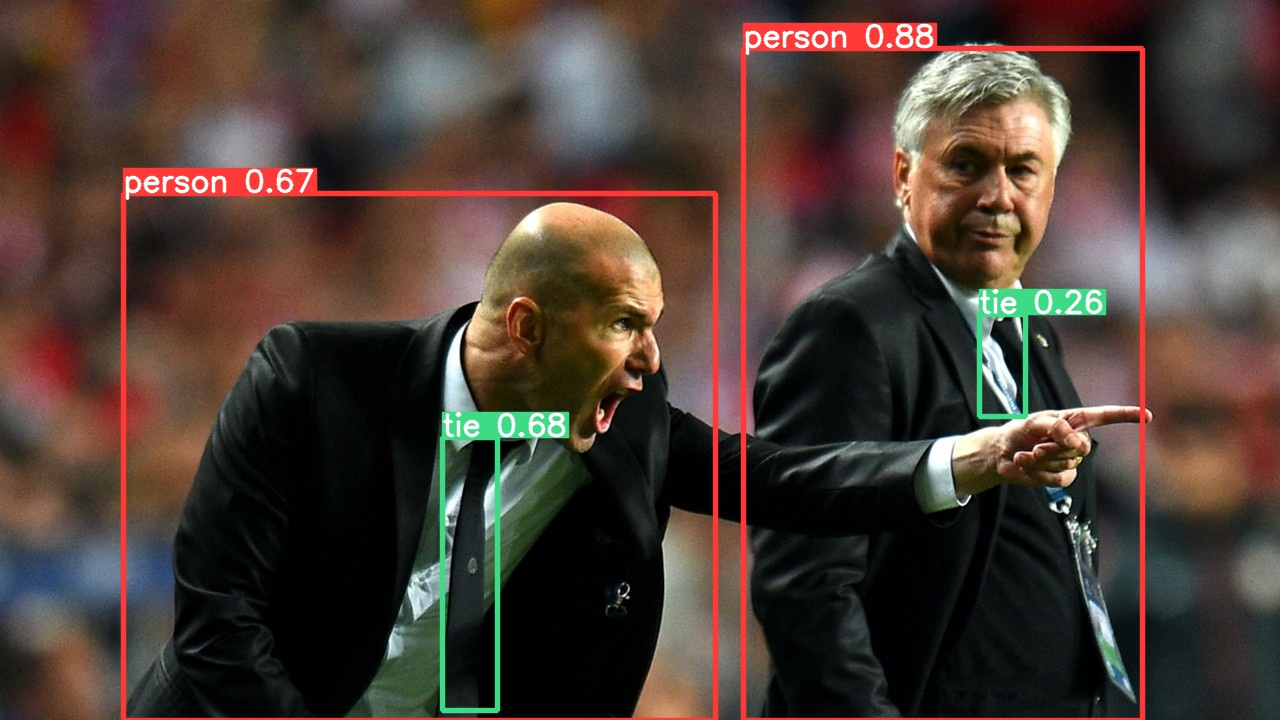

In [4]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)


In [5]:
!python train.py --img 640 --batch 50 --epochs 100 --data ../yolo_A/A.yaml --weights yolov5s.pt --nosave --cache


2024-04-02 01:18:06.017785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 01:18:06.017960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 01:18:06.149692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=../yolo_A/A.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=50, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False,

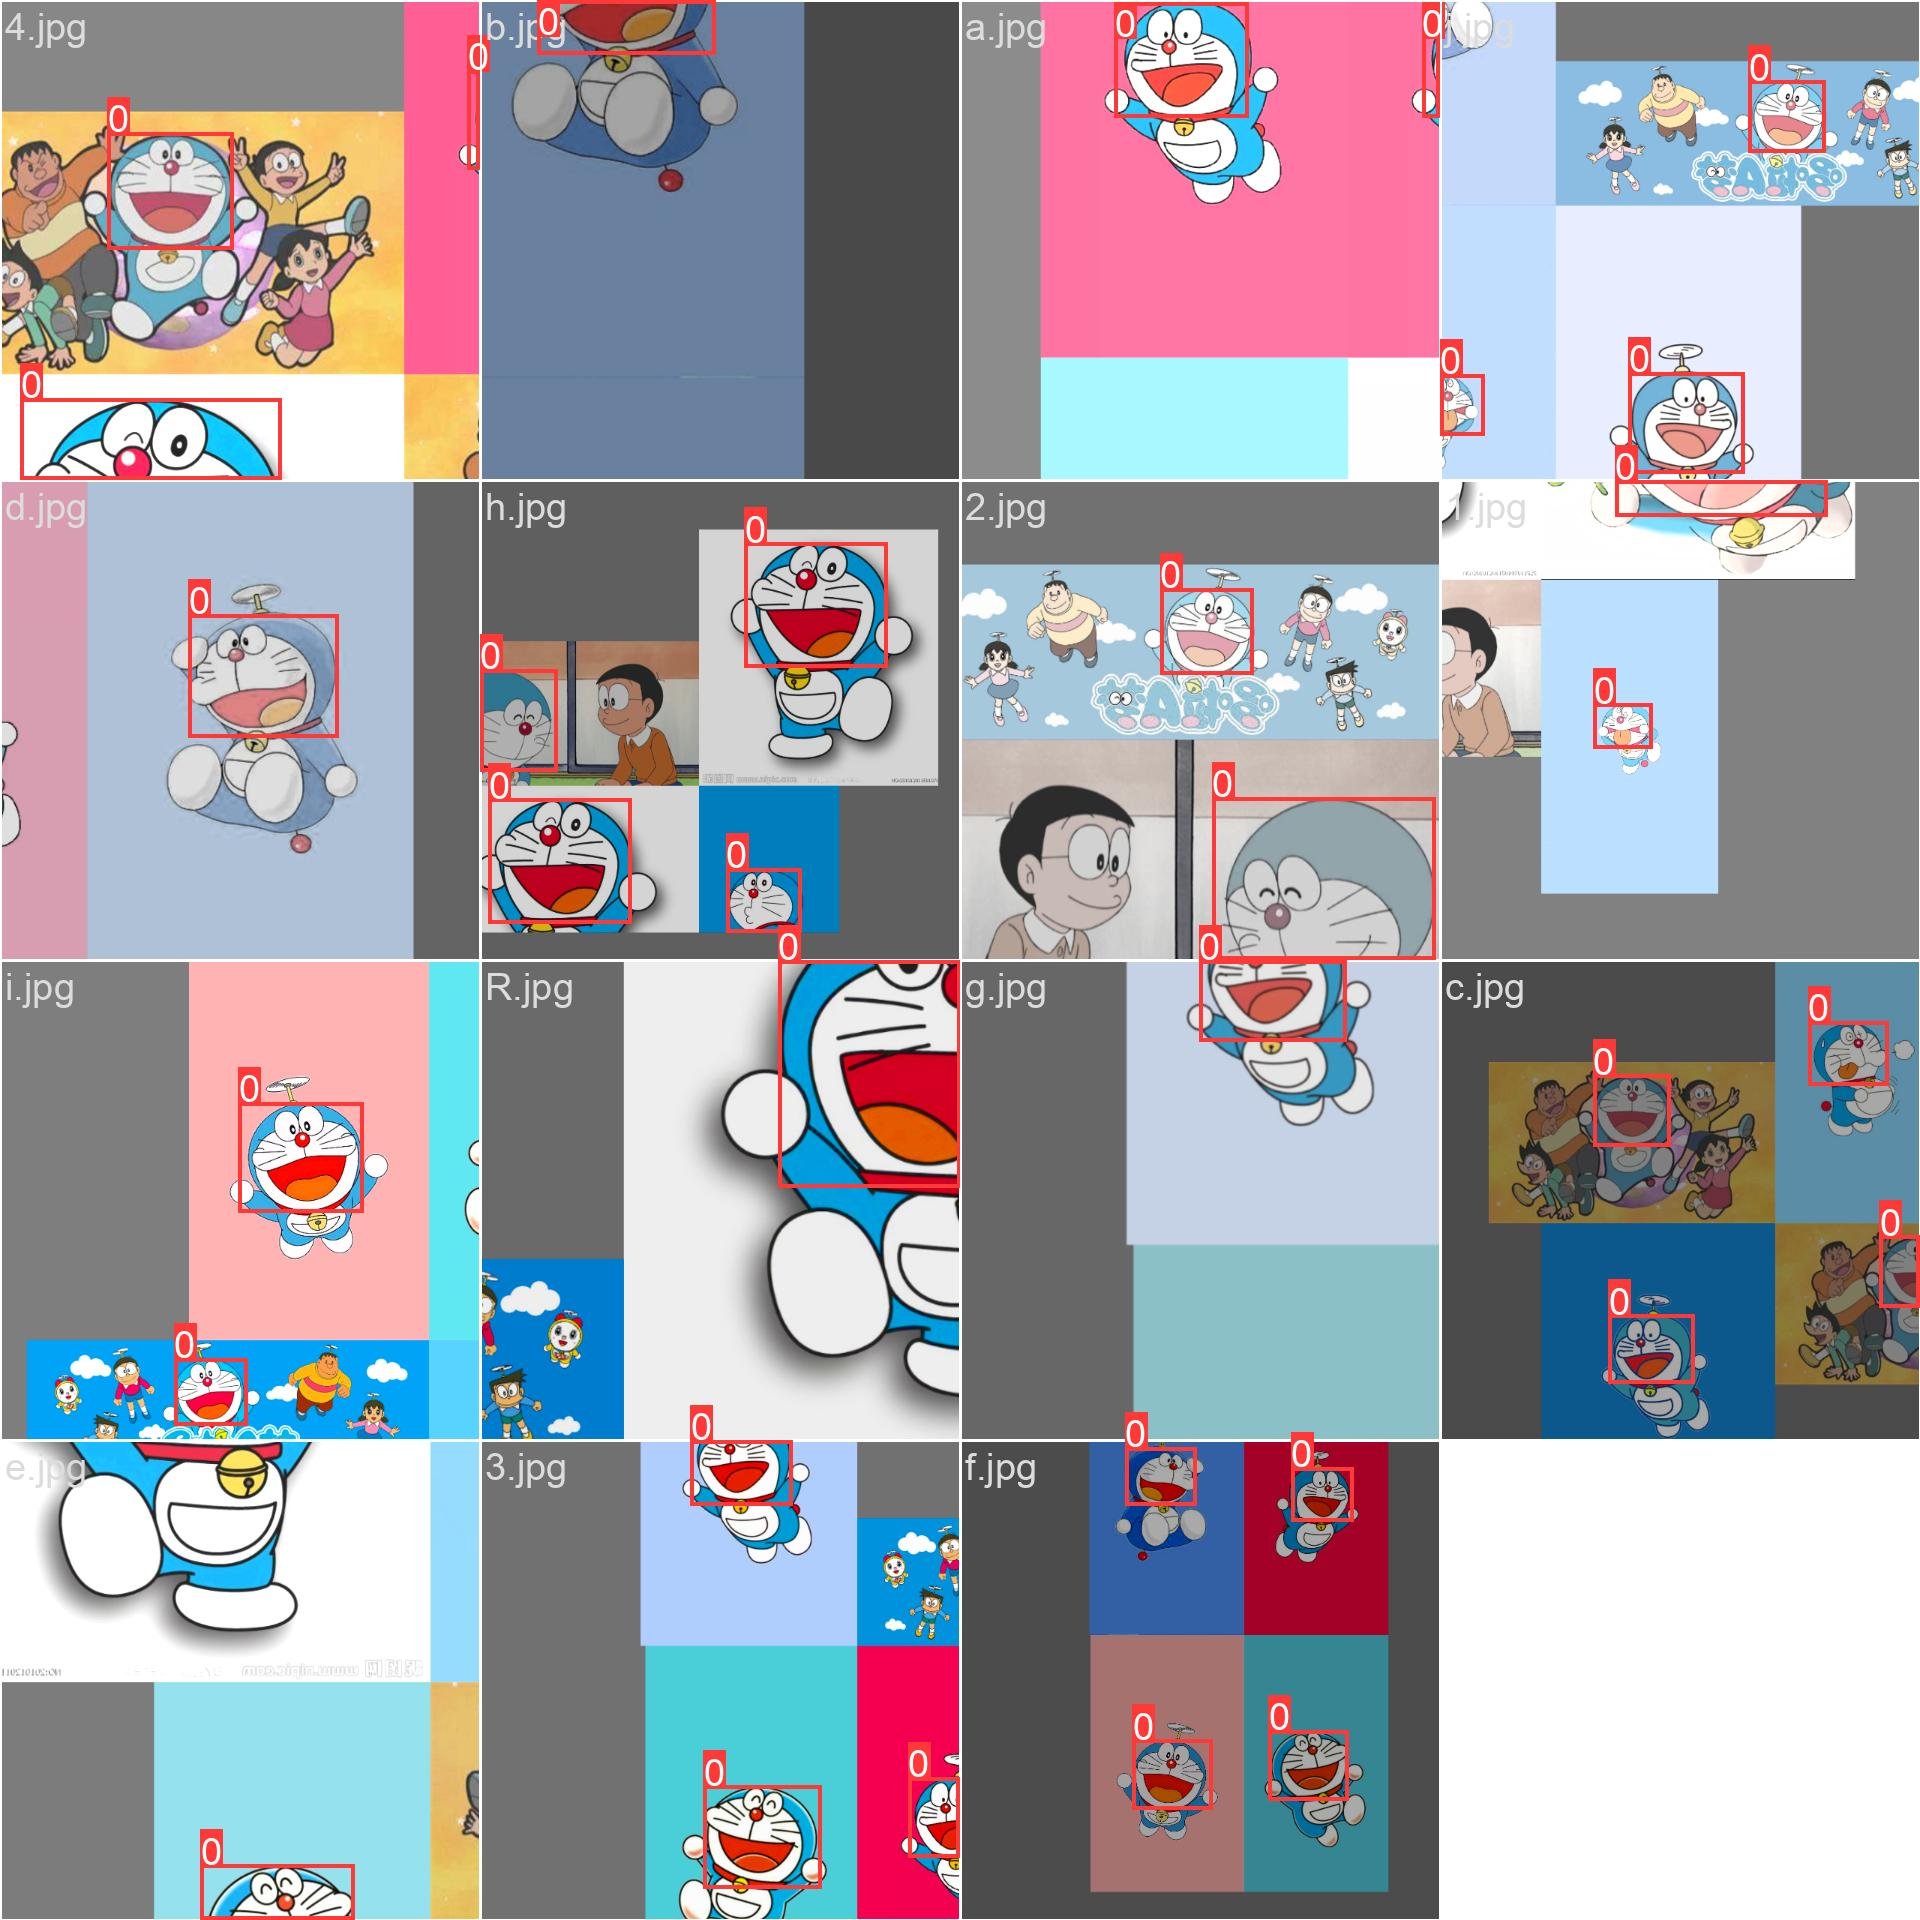

In [6]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # test batch 0 predictions


In [10]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../test2.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=../test2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/test2.jpg: 640x640 3 cats, 11.7ms
Speed: 0.9ms pre-process, 11.7ms inference, 917.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5
